## A/B testing Using Machine Learning 

### ML modelling with MLOps

### Spliting the data by browser and platform_os, and versioning each split as a new version of the data in dvc

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

### Loading the data of Users that Responded

In [3]:
# Loading from my local storage
path_to_data = "../data/Resp_dataSet.csv"
data=pd.read_csv(path_to_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1172 non-null   object
 1   experiment   1172 non-null   object
 2   date         1172 non-null   object
 3   hour         1172 non-null   int64 
 4   device_make  1172 non-null   object
 5   platform_os  1172 non-null   int64 
 6   browser      1172 non-null   object
 7   yes          1172 non-null   int64 
 8   no           1172 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 82.5+ KB


### Splitting the Data


In [7]:
# Checking the Most used Browsers and Platform_os
def high_frequency_category(data, column):
    list_Of_Handset_In_Column=list(data[column].value_counts().index)
    top_category_column = data[column].value_counts()
    
    return list_Of_Handset_In_Column, top_category_column

list_Of_browsers, top_browsers = high_frequency_category(data, "browser")
list_Of_platform_os, top_platform_os = high_frequency_category(data, "platform_os")

print(f" There are {len(list_Of_browsers)} browsers, and {len(list_Of_platform_os)} Platform Os used")

 There are 8 browsers, and 2 Platform Os used


Text(0.5, 1.0, 'List_Of_Top10_Platfrom_os Used')

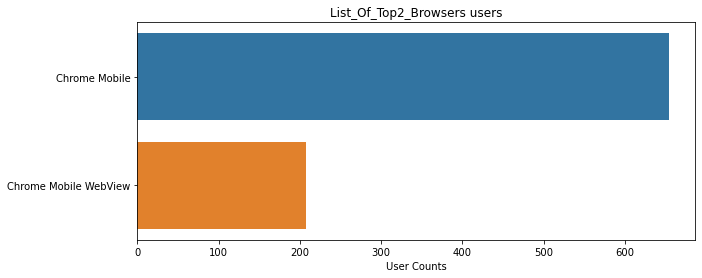

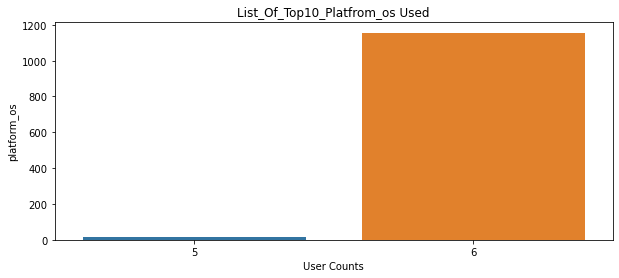

In [10]:
# Printing the 2 Most used Browsers and top_platform_os
plt.figure(figsize=(10,4))
sns.barplot(y = list_Of_browsers[:2], x = top_browsers[:2])
plt.xlabel('User Counts')
plt.title('List_Of_Top2_Browsers users')

plt.figure(figsize=(10,4))
sns.barplot(x = list_Of_platform_os[:2], y = top_platform_os[:2])
plt.xlabel('User Counts')
plt.title('List_Of_Top10_Platfrom_os Used')

In [11]:
# Using two most used Browsers and two most used platform_os, separating the data to form 4 dataset
def split_data(data, column, column_value):
    try:
        new_data_set = data[data[column]== column_value]
        
        return new_data_set
    except KeyError as e:
        print("Error occured, Try again",e)
        return data

browser1_dataset = split_data(data, "browser", "Chrome Mobile")
browser2_dataset = split_data(data, "browser", "Chrome Mobile WebView")
platform_os1_dataset = split_data(data, "platform_os", 6)
platform_os2_dataset = split_data(data, "platform_os", 5)

### Saving the New dataSets to new data Versions

In [16]:
# datasets_name = [browser1_dataset, browser2_dataset, platform_os1_dataset, platform_os2_dataset]
def save_new_dataset(dataset, dataset_name):
    print(">", dataset_name)
    try:
        dataset.to_csv('../data/'+dataset_name+'.csv', index=False)

    except Exception as e:
        print(e)

In [ ]:
save_new_dataset(browser1_dataset, 'browser1_dataset')
save_new_dataset(browser2_dataset, 'browser2_dataset')
save_new_dataset(platform_os1_dataset, 'platform_os1_dataset')
save_new_dataset(platform_os2_dataset, 'platform_os2_dataset')